# Model Definition and Evaluation
## Table of Contents
1. [Model Selection](#model-selection)
2. [Feature Engineering](#feature-engineering)
3. [Implementation](#implementation)
4. [Evaluation Metrics](#evaluation-metrics)
5. [Comparative Analysis](#comparative-analysis)

In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras import layers, Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential

2025-07-28 17:47:10.168896: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753724830.410192      37 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753724830.476280      37 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Model Selection

- The model used is a feedforward neural network based on 12 input features.
- The first hidden layer with 64 neurons and ReLU activation to capture non-linear patterns.
- Then regularization to prevent overfitting by randomly deactivating 30% of neurons during training.
- The second hidden layer with 32 neurons, also using ReLU.
- Then regularization to prevent overfitting by randomly deactivating 20% of neurons during training.
- Then an output layer for predicting a single continuous value of sales. 

The ReLU-activated dense layers can model non-linearities better than linear models.
Dropout layers help prevent overfitting.

## Feature Engineering

In [8]:
X_train = pd.read_csv('/kaggle/input/bakery-sales-dataset-split/x_train.csv')
Y_train = pd.read_csv('/kaggle/input/bakery-sales-dataset-split/y_train.csv')
X_val = pd.read_csv('/kaggle/input/bakery-sales-dataset-split/x_val.csv')
Y_val = pd.read_csv('/kaggle/input/bakery-sales-dataset-split/y_val.csv')

df_validation_split = pd.read_csv('/kaggle/input/df-val/df_validation_split.csv')

In [3]:
X_train_cnn = X_train.astype('float32').values
X_val_cnn = X_val.astype('float32').values

Y_train_cnn = Y_train.astype('float32').values
Y_val_cnn = Y_val.astype('float32').values

## Implementation

In [4]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(12,), name='dense_1'),
    Dropout(0.3),
    Dense(32, activation='relu', name='dense_2'),
    Dropout(0.2),
    Dense(1, activation='linear', name='output') ]
)


model.compile(
    optimizer='adam',
    loss='mape',
    metrics=['mape']
)


model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-07-28 17:47:27.029416: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
history = model.fit(
    X_train_cnn,
    Y_train_cnn,
    validation_data=(X_val_cnn, Y_val_cnn),
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 93.0828 - mape: 93.0828 - val_loss: 43.3069 - val_mape: 43.3069
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 42.8517 - mape: 42.8517 - val_loss: 28.6453 - val_mape: 28.6453
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 31.6235 - mape: 31.6235 - val_loss: 24.3744 - val_mape: 24.3744
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 27.4298 - mape: 27.4298 - val_loss: 23.9883 - val_mape: 23.9883
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 26.8456 - mape: 26.8456 - val_loss: 23.4289 - val_mape: 23.4289
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 27.1224 - mape: 27.1224 - val_loss: 23.1045 - val_mape: 23.1045
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 25.9554 - mape: 25.9554 - val_loss: 22.7351 - val_mape: 22.7351
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 25.7359 - mape: 25.7359 - val_loss: 22.3932 - val_mape: 22.3932
Epoch 9/

## Evaluation Metrics

**Metrics used: R² and MAPE**

In [6]:
y_pred_cnn = model.predict(X_val_cnn)

mape = mean_absolute_percentage_error(Y_val_cnn, y_pred_cnn)

print(f"Validation MAPE: {mape:.2f}")

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Validation MAPE: 0.19


In [9]:
import pandas as pd
from sklearn.metrics import mean_absolute_percentage_error

# Create a DataFrame with predictions and true values
val_results = pd.DataFrame({
    'y_true': Y_val_cnn.flatten(),
    'y_pred': y_pred_cnn.flatten()
})

# Define product group one-hot columns
one_hot_cols = [
    'Warengruppe_1', 'Warengruppe_2', 'Warengruppe_3',
    'Warengruppe_4', 'Warengruppe_5', 'Warengruppe_6'
]

# Add one-hot encoded product group columns from df_validation_split
val_results[one_hot_cols] = df_validation_split[one_hot_cols].reset_index(drop=True)

# Decode the one-hot to actual product group
val_results['product_group'] = val_results[one_hot_cols].idxmax(axis=1)

# Clean up group names (remove '#', if present)
val_results['product_group'] = val_results['product_group'].str.replace('#', '', regex=False)

# Compute MAPE per product group
mape_per_group = val_results.groupby('product_group', group_keys=False).apply(
    lambda g: mean_absolute_percentage_error(g['y_true'], g['y_pred'])
)


#  Display result
print("Validation MAPE per Product Group:")
print(mape_per_group)

Validation MAPE per Product Group:
product_group
Warengruppe_1    0.197225
Warengruppe_2    0.163807
Warengruppe_3    0.192119
Warengruppe_4    0.220140
Warengruppe_5    0.149874
Warengruppe_6    0.473475
dtype: float32


/tmp/ipykernel_37/2579397162.py:26: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  mape_per_group = val_results.groupby('product_group', group_keys=False).apply(


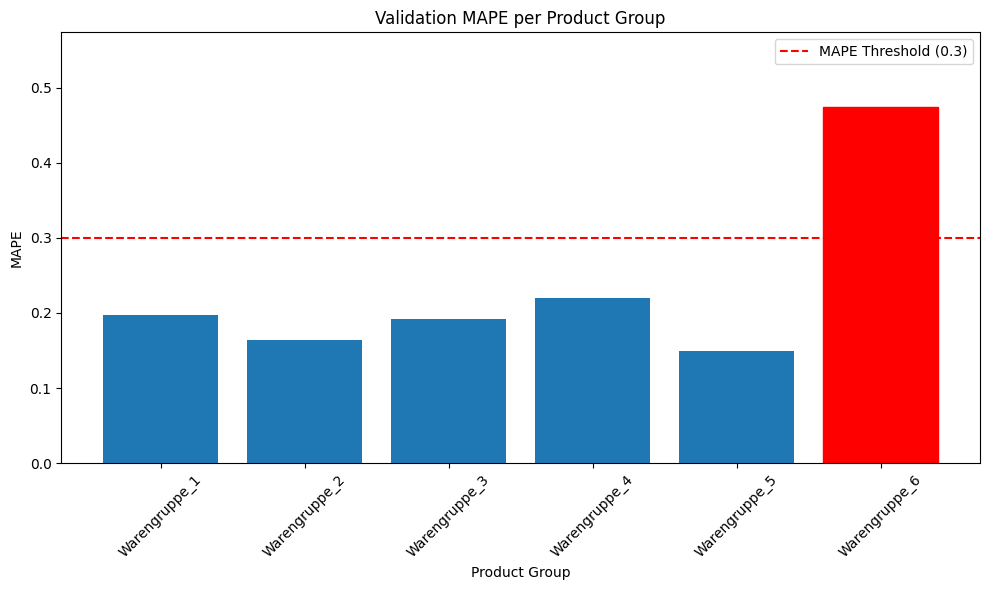

In [10]:
mape_per_group = pd.Series({
    'Warengruppe_1': 0.197225,
    'Warengruppe_2': 0.163807,
    'Warengruppe_3': 0.192119,
    'Warengruppe_4': 0.220140,
    'Warengruppe_5': 0.149874,
    'Warengruppe_6': 0.473475
})

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(mape_per_group.index, mape_per_group.values)
plt.axhline(0.3, color='red', linestyle='--', label='MAPE Threshold (0.3)')

# Highlight bars with high MAPE
for bar, val in zip(bars, mape_per_group.values):
    if val > 0.3:
        bar.set_color('red')

# Labels and formatting
plt.title('Validation MAPE per Product Group')
plt.ylabel('MAPE')
plt.xlabel('Product Group')
plt.xticks(rotation=45)
plt.ylim(0, max(mape_per_group.values) + 0.1)
plt.legend()
plt.tight_layout()
plt.show()

In [11]:
# Flatten if needed (especially if arrays are 2D like (1841, 1))
y_true = Y_val_cnn.flatten()
y_pred = y_pred_cnn.flatten()

# Calculate regression metrics
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

# Display results
print(f"Validation Performance Metrics:")
print(f"MAE (Mean Absolute Error): {mae:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Validation Performance Metrics:
MAE (Mean Absolute Error): 35.14
RMSE (Root Mean Squared Error): 56.62
R² Score: 0.8106


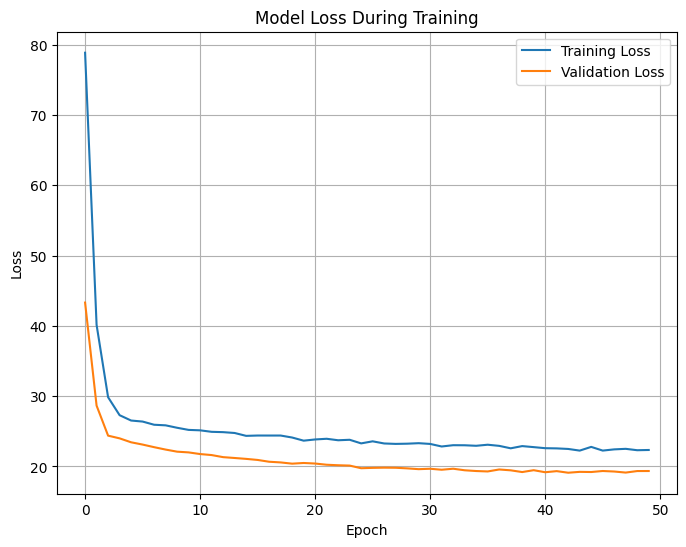

In [12]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

## Comparative Analysis

| Metric | Baseline Model | Deep Learning Model |
|--------|----------------|---------------------|
| R²     | 0.7220         | 0.8106              |
| MAPE   | 0.33           | 0.19                |